# MTH9879 Homework 6 Solution

Assigned: March 22, 2016.
Due: April 5, 2016 by 6pm. 

Late homework **will not be accepted**.

$$
\newcommand{\supp}{\mathrm{supp}}
\newcommand{\E}{\mathbb{E}}
\newcommand{\EE}{\mathbb{E}}
\newcommand{\Eof}[1]{\mathbb{E}\left[ #1 \right]}
\def\Cov{{ \mbox{Cov} }}
\def\Var{{ \mbox{Var} }}
\newcommand{\1}{\mathbf{1} }
\newcommand{\PP}{\mathbb{P} }
%\newcommand{\Pr}{\mathrm{Pr} }
\newcommand{\QQ}{\mathbb{Q} }
\newcommand{\RR}{\mathbb{R} }
\newcommand{\DD}{\mathbb{D} }
\newcommand{\HH}{\mathbb{H} }
\newcommand{\spn}{\mathrm{span} }
\newcommand{\cov}{\mathrm{cov} }
\newcommand{\sgn}{\mathrm{sgn} }
\newcommand{\HS}{\mathcal{L}_{\mathrm{HS}} }
%\newcommand{\HS}{\mathrm{HS} }
\newcommand{\trace}{\mathrm{trace} }
\newcommand{\LL}{\mathcal{L} }
%\newcommand{\LL}{\mathrm{L} }
\newcommand{\s}{\mathcal{S} }
\newcommand{\ee}{\mathcal{E} }
\newcommand{\ff}{\mathcal{F} }
\newcommand{\hh}{\mathcal{H} }
\newcommand{\bb}{\mathcal{B} }
\newcommand{\dd}{\mathcal{D} }
\newcommand{\g}{\mathcal{G} }
\newcommand{\p}{\partial}
\newcommand{\half}{\frac{1}{2} }
\newcommand{\T}{\mathcal{T} }
\newcommand{\bi}{\begin{itemize}}
\newcommand{\ei}{\end{itemize}}
\newcommand{\beq}{\begin{equation}}
\newcommand{\eeq}{\end{equation}}
\newcommand{\beas}{\begin{eqnarray*}}
\newcommand{\eeas}{\end{eqnarray*}}
\newcommand{\cO}{\mathcal{O}}
\newcommand{\cF}{\mathcal{F}}
\newcommand{\cI}{\mathcal{I}}
\newcommand{\cL}{\mathcal{L}}
\newcommand{\cM}{\mathcal{M}}
\newcommand{\BS}{\text{BS}}
$$

# Biya Wu


### 0. (0 points) 
Read the review article by McAleer and Medeiros and also the nice article by Barndorff-Nielsen et al.

## Comparison of estimators

### Download RV estimator code

In [5]:
download.file(url="http://mfe.baruch.cuny.edu/wp-content/uploads/2015/02/tq.zip", destfile="tq.zip")
unzip(zipfile="tq.zip")
download.file(url="http://mfe.baruch.cuny.edu/wp-content/uploads/2015/03/RvEstimators.R.zip", destfile="RvEstimators.R.zip")
unzip(zipfile="RvEstimators.R.zip")

### 1. (12 points) 
This assignment uses the *tqBAC* dataset from *tq.rData* and the RV estimators from *RvEstimators.R*.

In [6]:
load('tq.rData')
library(highfrequency)
source('RvEstimators.R')

(a) Consider the BAC trade price series.  Superimpose signature plots of the following estimators with subsampling frequency $q$ from 1 to 20: ZHOU, TSRV, MSRV, KRVTH, KRVC.  Express your results as $\sqrt{RV}$ to make them more intuitive, as in Table 1 of Lecture 6 (recall that volatility estimates should be of the order of $2\%$!).
<br>
Pay attention to good aesthetics, addling a proper legend to your plot.


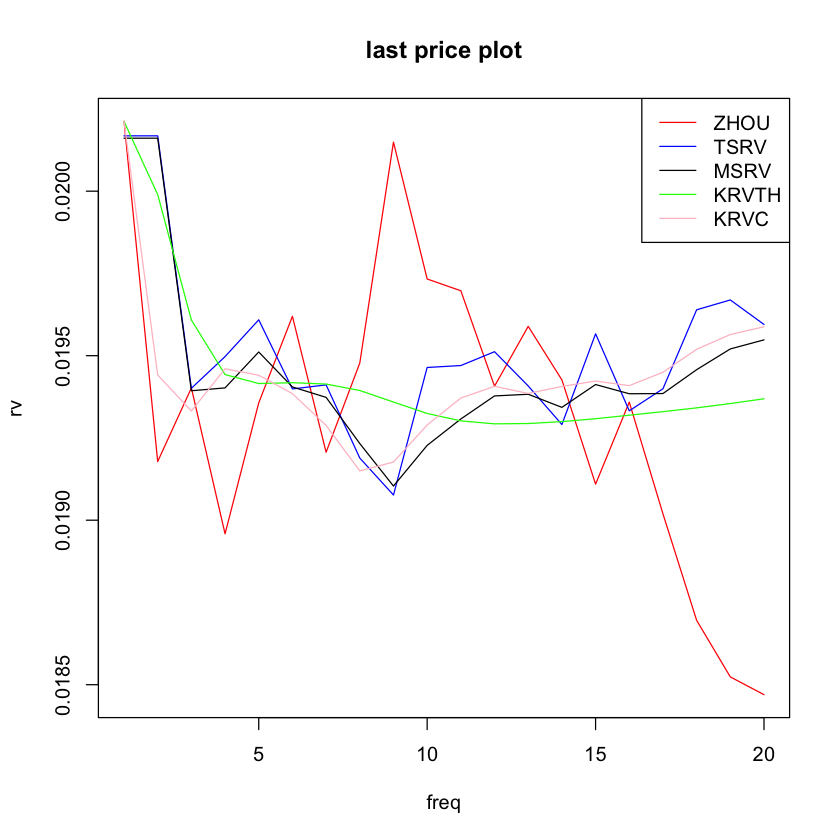

In [42]:
options(warn=-1)
px <- log(as.numeric(tqBAC$PRICE))

freq     <- 20
rv_ZHOU  <- sapply(1:freq, function(q){sqrt(ZHOU(px, q))})
rv_TSRV  <- sapply(1:freq, function(q){sqrt(TSRV(px, q))})
rv_MS    <- sapply(1:freq, function(q){sqrt(MSRV(px, q))})
rv_KRVTH <- sapply(1:freq, function(q){sqrt(KRVTH(px, q))})
rv_KRVC  <- sapply(1:freq, function(q){sqrt(KRVC(px, q))})

plot(1:freq, rv_ZHOU, col="red", type='l', ylab='rv', xlab='freq')
lines(rv_TSRV    , col="blue")
lines(rv_MS      , col="black")
lines(rv_KRVTH   , col="green")
lines(rv_KRVC    , col="pink")
legend("topright", c("ZHOU","TSRV","MSRV","KRVTH","KRVC"),lty = c(1,1,1,1,1), col=c("red","blue","black","green","pink"))
title("last price plot")



(b) Repeat part (a) for the BAC mid-quote series.


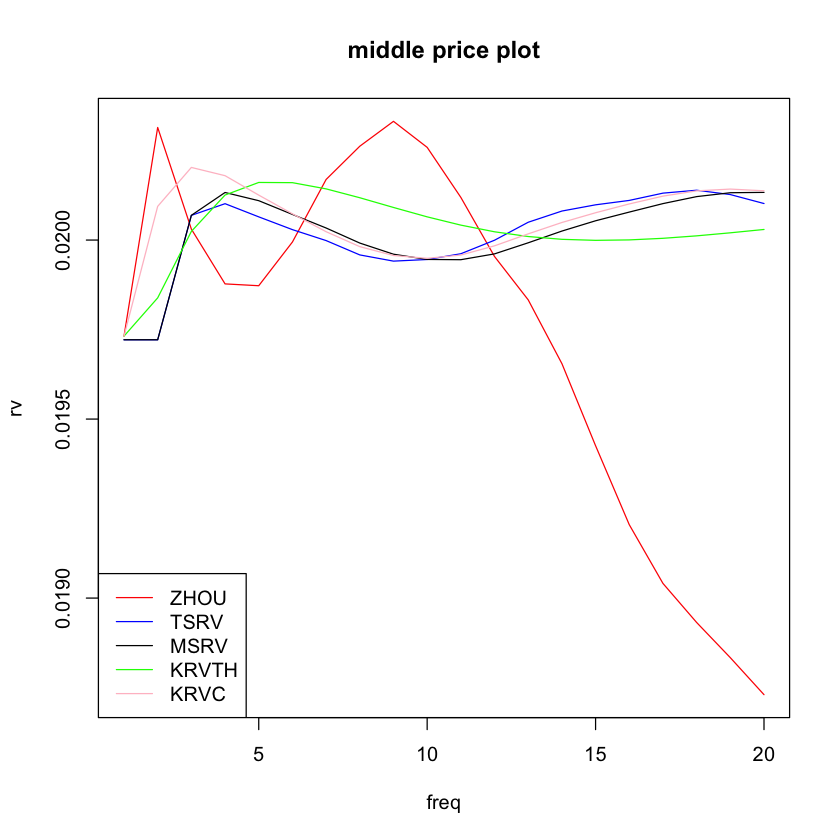

In [16]:
px <- log(as.numeric((as.numeric(tqBAC$BID)+as.numeric(tqBAC$OFR))/2))

freq     <- 20
rv_ZHOU  <- sapply(1:freq, function(q){sqrt(ZHOU(px, q))})
rv_TSRV  <- sapply(1:freq, function(q){sqrt(TSRV(px, q))})
rv_MS    <- sapply(1:freq, function(q){sqrt(MSRV(px, q))})
rv_KRVTH <- sapply(1:freq, function(q){sqrt(KRVTH(px, q))})
rv_KRVC  <- sapply(1:freq, function(q){sqrt(KRVC(px, q))})

plot(1:freq, rv_ZHOU, col="red", type='l', ylab='rv', xlab='freq')
lines(rv_TSRV    , col="blue")
lines(rv_MS      , col="black")
lines(rv_KRVTH   , col="green")
lines(rv_KRVC    , col="pink")
legend("bottomleft", c("ZHOU","TSRV","MSRV","KRVTH","KRVC"),lty = c(1,1,1,1,1), col=c("red","blue","black","green","pink"))
title("middle price plot")

(c) Which of these estimators do you recommend and why?  What sub-sampling frequency do you recommend based on these pictures?

#### Answer

I will select KRVTH becuase of its stability. For frequency I will choose 5.

## The Epps effect

### 2. (14 points) 
For this assignment, use the *tqBAC* and  *tqC* datasets from *tq.rData*, the function *getSymbols* from the *quantmod* package, and the function *aggregatets* from the * highfrequency* package.

In [30]:
load('tq.rData')
library(highfrequency)
library(quantmod)

(a) Write a function to aggregate a *tq* object (such as *tqBAC*) to the nearest $k$ seconds. <br>
(Hint: Use the function *aggregatets(.)*).



In [31]:
aggregate_tq <- function(tq, k_){
    return (aggregatets(tq,on="seconds", k=k_))
}


(b) Write a function to compute the correlation between two high-frequency log return series (in *tq* format) where the underlying prices have been aggregated to the nearest $k$ seconds.


In [32]:
corr_tq <- function(tq1, tq2){
    return (cor(tq1, tq2))
}


(c) Plot the correlation between BAC and C returns where these returns are sampled every $k$ seconds, with $ k  \in \{2,3,4,. .., 599,600\} $.  Use a kernel smoothing function such as *ksmooth* to smooth your results.  Make sure the aesthetics are good with nice labels etc.


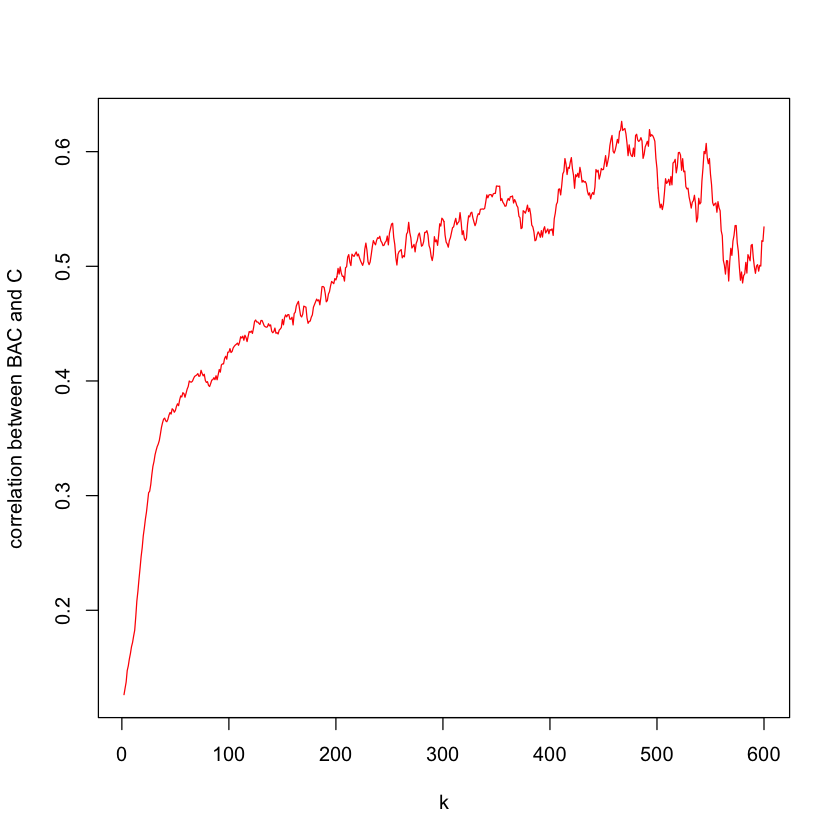

In [49]:
corr_k <- function (k){
    return (corr_tq(diff(log(as.numeric(aggregate_tq(tqBAC, k)$PRICE))), diff(log(as.numeric(aggregate_tq(tqC, k)$PRICE)))))
}

plot(2:600, ksmooth(2:600, sapply(2:600, corr_k), bandwidth = 20)$y,col="red", type = "l", ylab="correlation between BAC and C",xlab="k")



(d)  Is your plot consistent with the Epps effect?  What was the intraday correlation between BAC and C returns on 04-May-2012?


#### Answer

Yes, Epps effect emerges. <br\>
From the diagram above, the correlation stablizes at 0.5 so I deam 0.5 as a sound approximation of intraday correlation.


(e) Use the function *getSymbols* from *quantmod* to download daily data for BAC and C from 01-Jan-2012 to 31-Dec-2012.  What was the historical correlation of daily BAC and C returns over that period?

In [105]:
d1<-getSymbols("BAC", src = "yahoo", from = "2012-01-01", to = "2012-12-31")
d2<-getSymbols("C"  , src = "yahoo", from = "2012-01-01", to = "2012-12-31")
cor(diff(log(as.numeric(BAC$BAC.Adjusted))), diff(log(as.numeric(C$C.Adjusted))))

[1] 0.7999082

## The Hayashi-Yoshida estimator

### 3. (2 points) 
Show that when two time series $p^{(1)}$ and $p^{(2)}$ are synchronous, the Hayashi-Yoshida estimator coincides with the realized covariance estimator.

### <font color=blue> Solution. </font>
When the two time series are synchronous,

$$
v_{ij}={\bf 1}_{[t_{i-1},t_i] \cap [t_{j-1},t_j] \neq \emptyset} = \delta_{ij}
$$

so

\begin{eqnarray*}
HY_t &=& \sum_{i \leq t}\,\sum_{j \leq t}\,(p^{(1)}_i-p^{(1)}_{i-1})\,(p^{(2)}_j-p^{(2)}_{j-1})\,v_{ij}\\
&=& \sum_{i \leq t}\,(p^{(1)}_i-p^{(1)}_{i-1})\,(p^{(2)}_i-p^{(2)}_{i-1})
\end{eqnarray*}

which is just the realized covariance estimator.


## Fulvio Corsi's HAR-RV model

The following code loads the data of SPX realized volatility required for this problem. Data were downloaded from the Oxford-Man website

In [11]:
download.file(url="http://mfe.baruch.cuny.edu/wp-content/uploads/2015/03/spx_krv.rData_.zip", destfile="spx_krv.zip")
unzip(zipfile="spx_krv.zip")
load("spx_krv.rData")

In [12]:
data.frame(head(spx.krv))

           head.spx.krv.
2000-01-03  0.0001607266
2000-01-04  0.0002643965
2000-01-05  0.0003046503
2000-01-06  0.0001485821
2000-01-07  0.0001232670
2000-01-10  0.0001306934

### 4. (12 points)

(a) Rerun the HAR-RV example code using the 2008 *DJI_RV* sample from the *highfrequency* package.

(b) Repeat the analysis of part (a) with *spx.krv* restricted to 2008.

(c) Tabulate the HAR-RV coefficients for the two 2008 datasets.  Are they similar or do they differ?  Is most weight on the 1-day, 5-day, or 22-day RV?

(d) Using *quantmod* download daily VIX data.  Subset this data to 2008 and plot ${\rm VIX}^2$.

(e)  Plot SPX RV and superimpose DJI RV for 2008. Superimpose a plot of $\text{VIX}^2$, adding a scale on the right hand axis (see how this is done in the lecture iPython notebook). Comment on the resulting plot.
